In [1]:
from fxdayu_data import DataAPI
from datetime import datetime
import tushare as ts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import alphalens

DataAPI.set_file('D:/PycharmProjects/Quant_Alpha/Data_Manager/Factor_Selection/config.py')

def coder(code):
    if code.startswith('6'):
        return code + '.XSHG'
    elif code.startswith('0') or code.startswith('3'):
        return code + '.XSHE'
    else:
        return code

name = ts.get_hs300s()
name_list = list(name.code)
codes = tuple(map(coder, name_list))
print(codes)

('002230.XSHE', '002299.XSHE', '601225.XSHG', '002174.XSHE', '601727.XSHG', '600019.XSHG', '601127.XSHG', '002385.XSHE', '601216.XSHG', '300070.XSHE', '000709.XSHE', '002074.XSHE', '600074.XSHG', '000983.XSHE', '300133.XSHE', '300072.XSHE', '601118.XSHG', '300059.XSHE', '000826.XSHE', '300144.XSHE', '600867.XSHG', '300024.XSHE', '002131.XSHE', '002152.XSHE', '600188.XSHG', '600010.XSHG', '600009.XSHG', '000792.XSHE', '300002.XSHE', '600048.XSHG', '002739.XSHE', '300017.XSHE', '300033.XSHE', '000778.XSHE', '600271.XSHG', '300058.XSHE', '601258.XSHG', '601600.XSHG', '300251.XSHE', '000060.XSHE', '600383.XSHG', '600875.XSHG', '002146.XSHE', '600111.XSHG', '600256.XSHG', '601933.XSHG', '600873.XSHG', '600446.XSHG', '300027.XSHE', '000027.XSHE', '000425.XSHE', '600583.XSHG', '300168.XSHE', '002153.XSHE', '601021.XSHG', '000977.XSHE', '000555.XSHE', '000402.XSHE', '002183.XSHE', '600352.XSHG', '600157.XSHG', '000876.XSHE', '600582.XSHG', '601611.XSHG', '000800.XSHE', '000630.XSHE', '600718.X

In [2]:
PN = DataAPI.factor(codes, ('high', 'low', 'close', 'volume'), start=datetime(2013, 1, 1))
print PN

<class 'pandas.core.panel.Panel'>
Dimensions: 300 (items) x 1077 (major_axis) x 4 (minor_axis)
Items axis: 000001.XSHE to 603993.XSHG
Major_axis axis: 2013-01-04 15:00:00 to 2017-06-13 15:00:00
Minor_axis axis: close to volume


In [3]:
data = PN.minor_xs('close').pct_change()
cond1 = data>0
cond2 = data<0
data[cond1]=1
data[cond2]=-1

def sum(row):
    row=row[1]
    return row.sum()

data['AD'] = map(sum, data.iterrows())
data['ADP'] = data.AD/len(codes)
print data.head(10)

                     000001.XSHE  000002.XSHE  000008.XSHE  000009.XSHE  \
datetime                                                                  
2013-01-04 15:00:00          NaN          NaN          NaN          NaN   
2013-01-07 15:00:00          1.0          NaN          1.0          1.0   
2013-01-08 15:00:00         -1.0          NaN          1.0         -1.0   
2013-01-09 15:00:00         -1.0          NaN          1.0          1.0   
2013-01-10 15:00:00          1.0          NaN          1.0          0.0   
2013-01-11 15:00:00         -1.0          NaN         -1.0         -1.0   
2013-01-14 15:00:00          1.0          NaN          1.0          1.0   
2013-01-15 15:00:00          1.0          NaN          0.0          1.0   
2013-01-16 15:00:00          1.0          NaN         -1.0          0.0   
2013-01-17 15:00:00         -1.0          NaN          1.0         -1.0   

                     000027.XSHE  000039.XSHE  000060.XSHE  000061.XSHE  \
datetime                

In [4]:
#HLP
#Highest
high = PN.minor_xs('high')

def recent_high(series, window=5):
    return series.rolling(window).max()

high_dict = {}
for name, candle in high.iteritems():
    HLP = recent_high(candle)
    high_dict[name] = HLP

highest = pd.DataFrame(high_dict)
cond_h = high>=highest
cond_no = high<highest
highest[cond_h]=1
highest[cond_no]=0

highest = pd.DataFrame(high_dict)
cond_h = high>=highest
cond_no = high<highest
highest[cond_h]=1
highest[cond_no]=0

data['High'] = map(sum, highest.iterrows())

print data.High.head(10)

datetime
2013-01-04 15:00:00      0.0
2013-01-07 15:00:00      0.0
2013-01-08 15:00:00      0.0
2013-01-09 15:00:00      0.0
2013-01-10 15:00:00     67.0
2013-01-11 15:00:00     59.0
2013-01-14 15:00:00    105.0
2013-01-15 15:00:00    194.0
2013-01-16 15:00:00     95.0
2013-01-17 15:00:00     59.0
Name: High, dtype: float64


In [5]:
#Lowest
low = PN.minor_xs('low')

def recent_low(series, window=5):
    return series.rolling(window).min()

low_dict = {}
for name, candle in low.iteritems():
    HLP = recent_low(candle)
    low_dict[name] = HLP
    
lowest = pd.DataFrame(low_dict)
cond_l = low<=lowest
cond_no = low>lowest
lowest[cond_l]=1
lowest[cond_no]=0

data['Low'] = map(sum, lowest.iterrows())
data['HLP'] = (data.High-data.Low)/len(codes)

print data.HLP.head(10)

datetime
2013-01-04 15:00:00    0.000000
2013-01-07 15:00:00    0.000000
2013-01-08 15:00:00    0.000000
2013-01-09 15:00:00    0.000000
2013-01-10 15:00:00    0.150000
2013-01-11 15:00:00   -0.246667
2013-01-14 15:00:00   -0.016667
2013-01-15 15:00:00    0.640000
2013-01-16 15:00:00    0.283333
2013-01-17 15:00:00    0.133333
Name: HLP, dtype: float64


In [6]:
#MA50
import talib as ta

close = PN.minor_xs('close')

ma = pd.DataFrame({item: ta.MA(series.values, 50) for item, series in close.iteritems()}, index=close.index)
cond_ma = close>=ma
cond_no = close<ma

ma[cond_ma] = 1
ma[cond_no] = -1

data['MA'] = map(sum, ma.iterrows())
data['MAP'] = data.MA/len(codes)

result = pd.concat([data.ADP, data.HLP, data.MAP], axis=1)
HS300 = DataAPI.MarketIndex('000001.XSHG','D', ('close', 'volume'),start=datetime(2013, 1, 1))
result['HS300_close'] = HS300.close
result['HS300_volume'] = HS300.volume

print result

                          ADP       HLP       MAP  HS300_close  HS300_volume
datetime                                                                    
2013-01-04 15:00:00  0.000000  0.000000  0.000000      2276.99   139469931.0
2013-01-07 15:00:00  0.090000  0.000000  0.000000      2285.36   118162813.0
2013-01-08 15:00:00  0.036667  0.000000  0.000000      2276.07   122907877.0
2013-01-09 15:00:00 -0.100000  0.000000  0.000000      2275.34   122014924.0
2013-01-10 15:00:00  0.196667  0.150000  0.000000      2283.66   120066676.0
2013-01-11 15:00:00 -0.653333 -0.246667  0.000000      2243.00   125068275.0
2013-01-14 15:00:00  0.890000 -0.016667  0.000000      2311.74   144749889.0
2013-01-15 15:00:00  0.476667  0.640000  0.000000      2325.68   165645981.0
2013-01-16 15:00:00 -0.323333  0.283333  0.000000      2309.50   153511167.0
2013-01-17 15:00:00 -0.436667  0.133333  0.000000      2284.91   119101835.0
2013-01-18 15:00:00  0.736667  0.243333  0.000000      2317.07   125438026.0

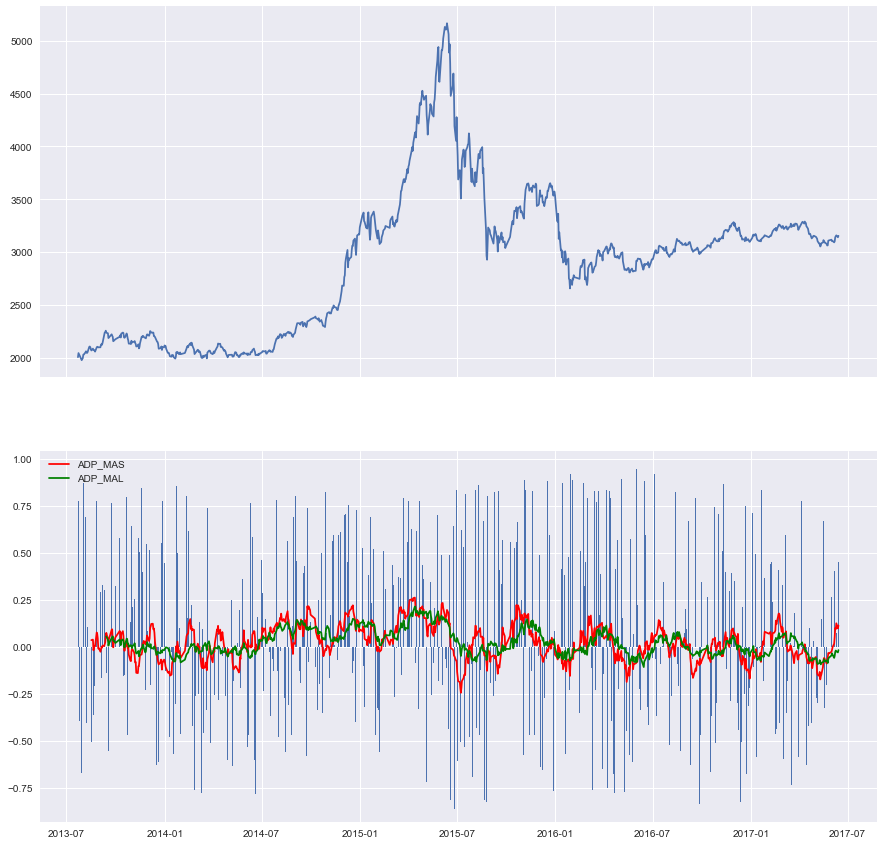

In [57]:
import matplotlib.pyplot as plt

result = result.dropna()


result['ADP_MAS'] = ta.abstract.MA(result, 20, price='ADP')
result['ADP_MAL'] = ta.abstract.MA(result, 40, price='ADP')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 15))
ax1.plot(result.HS300_close)
ax2.bar(result.index, result.ADP)
ax2.plot(result.ADP_MAS, c='r', label ='ADP_MAS')
ax2.plot(result.ADP_MAL, c='g', label ='ADP_MAL')
ax2.legend(loc='upper left')
plt.show()

## 用宽度数据与成交量作为回归的数据
1. 平滑宽度数据
2. Plot出来

In [20]:
result['HLP_MAS'] = ta.abstract.MA(result, 20, price='HLP')
result['HLP_MAL'] = ta.abstract.MA(result, 40, price='HLP')

result['MAP_MAS'] = ta.abstract.MA(result, 20, price='MAP')
result['MAP_MAL'] = ta.abstract.MA(result, 40, price='MAP')

result['VOL_MAS'] = ta.abstract.MA(result, 20, price='HS300_volume')
result['VOL_MAL'] = ta.abstract.MA(result, 40, price='HS300_volume')

print result

                          ADP       HLP       MAP  HS300_close  HS300_volume  \
datetime                                                                       
2013-05-23 15:00:00 -0.466667  0.026667  0.306667      2275.67   124019844.0   
2013-05-24 15:00:00  0.540000 -0.196667  0.376667      2288.53   101441213.0   
2013-05-27 15:00:00  0.093333  0.083333  0.400000      2293.08   107325061.0   
2013-05-28 15:00:00  0.266667  0.073333  0.500000      2321.32   132632995.0   
2013-05-29 15:00:00  0.003333  0.420000  0.490000      2324.02   125250729.0   
2013-05-30 15:00:00 -0.236667  0.140000  0.450000      2317.75   111913032.0   
2013-05-31 15:00:00 -0.576667 -0.023333  0.393333      2300.59   108162554.0   
2013-06-03 15:00:00 -0.076667 -0.290000  0.393333      2299.25    96882814.0   
2013-06-04 15:00:00 -0.686667 -0.693333  0.226667      2272.42   101895818.0   
2013-06-05 15:00:00  0.086667 -0.426667  0.266667      2270.93    76483303.0   
2013-06-06 15:00:00 -0.560000 -0.453333 

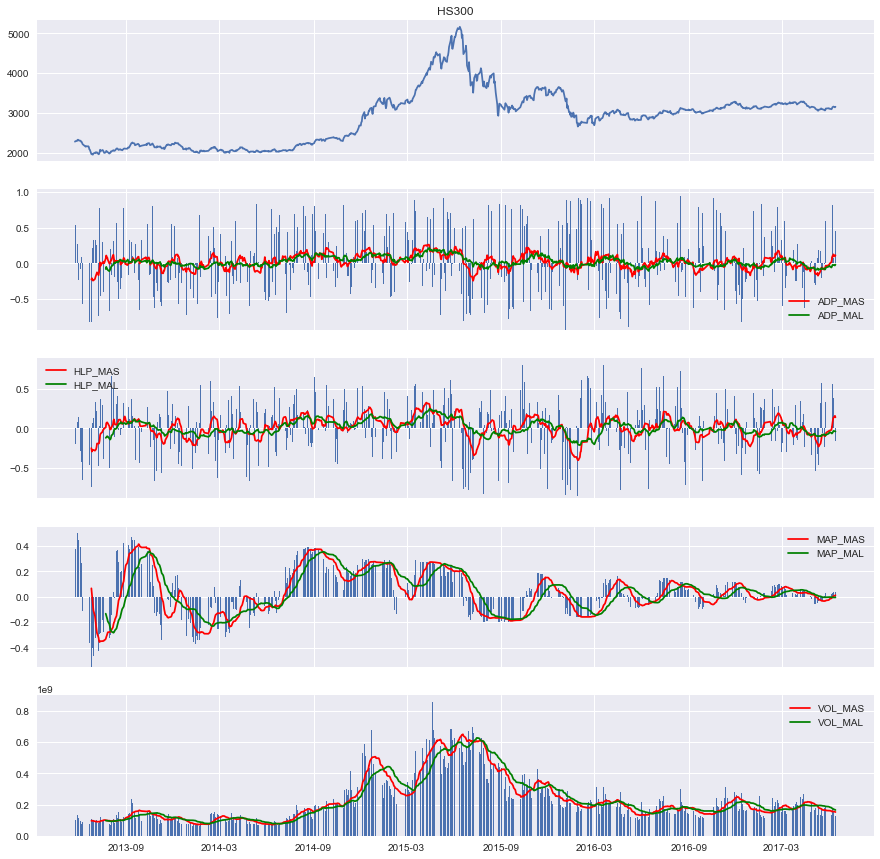

In [21]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True, figsize=(15, 15))
# f = plt.figure(figsize=(15, 9))
ax1.plot(result.HS300_close)
ax1.set_title('HS300')
ax2.bar(result.index, result.ADP)
ax2.plot(result.ADP_MAS, c='r', label ='ADP_MAS')
ax2.plot(result.ADP_MAL, c='g', label ='ADP_MAL')
ax2.legend()
ax3.bar(result.index, result.HLP)
ax3.plot(result.HLP_MAS, c='r', label ='HLP_MAS')
ax3.plot(result.HLP_MAL, c='g', label ='HLP_MAL')
ax3.legend()
ax4.bar(result.index, result.MAP)
ax4.plot(result.MAP_MAS, c='r', label ='MAP_MAS')
ax4.plot(result.MAP_MAL, c='g', label ='MAP_MAL')
ax4.legend()
ax5.bar(result.index, result.HS300_volume)
ax5.plot(result.VOL_MAS, c='r', label ='VOL_MAS')
ax5.plot(result.VOL_MAL, c='g', label ='VOL_MAL')
ax5.legend()
plt.show()

## 回归数据
1. 4个MAS数据整理
2. OLS回归
3. 滚动OLS回归
4. 机器学习的回归

In [56]:
from sklearn import linear_model
from sklearn.metrics import r2_score

reg = linear_model.LinearRegression()

result = result.dropna()
y = result.HS300_close.values
target = result[["ADP_MAS", "HLP_MAS", "MAP_MAS", 'VOL_MAS']]
data = map(lambda row: list(row[1]), target.iterrows())

diabetes_X_train = data[:-20]
diabetes_X_test = data[-20:]

diabetes_y_train = y[:-20]
diabetes_y_test = y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients:', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

('Coefficients:', array([ -8.18720545e+02,   8.68412842e+02,  -3.19428290e+02,
         4.06243866e-06]))
Mean squared error: 235367.23
Variance score: -313.39
